## Hierarchichal clustering for Heart Disease data set

### Import libraries ...

In [72]:
%matplotlib inline

import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

## Clustering patient by age according to chol, sex, chest pain type, etc

In [73]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv
# rename columns since the file does not contain names.
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]
print(df_hds.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')


In [74]:
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
#df_hds["goal"] = nmp.where(df_hds['goal'] >= 1, 1, df_hds['goal']) 
df_hds["ca"] = nmp.where(df_hds['ca']=='?', '0.0', df_hds['ca'])
df_hds["thal"] = nmp.where(df_hds['thal']=='?', '3.0', df_hds['thal'])

In [75]:
# the 2 variables 'thal and 'ca' are categorical and need to be transformed into numeric.
df_hds["thal"] = pnd.to_numeric(df_hds['thal'])
df_hds["ca"] = pnd.to_numeric(df_hds['ca'])

In [76]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [77]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Feature negineering

In [78]:
# 'sex' is useless
df_sex = pnd.get_dummies(df_hds['sex'])
df_sex.columns = ['male', 'female']
df_hds = pnd.concat([df_sex, df_hds], axis=1)
del df_hds['sex']
df_hds.head()

,male,female,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,0,1,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,0,1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,0,1,67.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,0,1,37.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,1,0,41.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [79]:
# simulate age groups
#df_hds["age"] = nmp.where((df_hds[df_hds['age']>= 60]) & (df_hds[df_hds['age']< 70]), '60.0', 'df_hds['age']')
df_hds["age"] = nmp.where((df_hds['age']>= 0) & (df_hds['age']< 25), 20.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 25) & (df_hds['age']< 30), 25.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 30) & (df_hds['age']< 35), 30.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 35) & (df_hds['age']< 40), 35.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 40) & (df_hds['age']< 45), 40.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 45) & (df_hds['age']< 50), 45.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 50) & (df_hds['age']< 55), 50.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 55) & (df_hds['age']< 60), 55.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 60) & (df_hds['age']< 65), 60.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 65) & (df_hds['age']< 70), 65.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 70) & (df_hds['age']< 75), 70.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 75) & (df_hds['age']< 80), 75.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 80) & (df_hds['age']< 150), 80.0, df_hds['age'])
# select the columns
#X_columns = df.columns[2:]
X_columns = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

## Model training - 

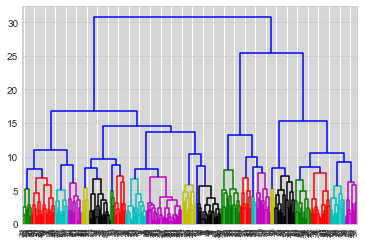

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({4: 51, 3: 40, 5: 35, 9: 32, 1: 30, 7: 27, 2: 24, 10: 24, 8: 22, 6: 18})


In [80]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [81]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 30
[35.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0]
2 24
[40.0, 40.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0, 75.0]
3 40
[25.0, 30.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 70.0, 70.0]
4 51
[30.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 65.0, 65.0, 70.0]
5 35
[35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0

In [82]:
# select the columns: remove 'fbs', not really pertinent
#X_columns = df.columns[2:]
X_columns = ['cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

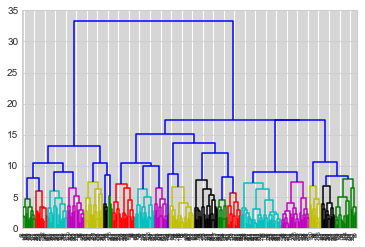

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({8: 62, 1: 57, 10: 32, 4: 30, 2: 25, 5: 24, 6: 21, 7: 21, 3: 20, 9: 11})


In [83]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [84]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 57
[35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 70.0, 70.0]
2 25
[45.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0]
3 20
[35.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 65.0, 65.0]
4 30
[40.0, 40.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 75.0]
5 24
[35.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 70.0]
6 21
[40.0, 40.0, 40.0, 50.0, 50.0

In [85]:
#remove restecg
#X_columns = df.columns[2:]
X_columns = ['cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

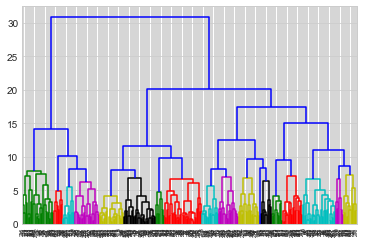

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({4: 51, 5: 42, 6: 33, 3: 33, 9: 30, 7: 30, 1: 29, 8: 28, 10: 19, 2: 8})


In [86]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [87]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 29
[45.0, 45.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0]
2 8
[55.0, 55.0, 55.0, 55.0, 55.0, 65.0, 65.0, 70.0]
3 33
[35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
4 51
[25.0, 30.0, 30.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 65.0, 70.0]
5 42
[35.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0,

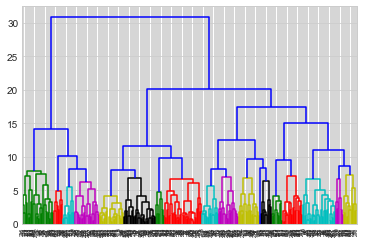

{1, 2, 3, 4, 5}
Counter({2: 93, 1: 70, 3: 63, 5: 49, 4: 28})


In [88]:
#less clusters
k = 5
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [89]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 70
[35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0, 70.0, 70.0]
2 93
[25.0, 30.0, 30.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0, 70.0, 70.0]
3 63
[35.0

In [90]:
# select the columns: not really pertinent; remove blood sugar
# keep only variables that appeared as most significant in previous analysis: 
#X_columns = df.columns[2:]
X_columns = ['cp', 'chol', 'exang', 'oldpeak', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

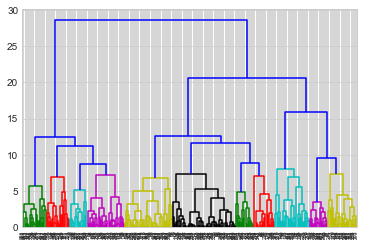

{1, 2, 3, 4, 5}
Counter({1: 93, 3: 93, 5: 43, 2: 43, 4: 31})


In [91]:
#less clusters
k = 5
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [92]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 93
[35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 70.0, 70.0, 75.0]
2 43
[25.0, 30.0, 30.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 50.0, 50.0, 50.0, 50.0, 50.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 60.0, 60.0, 60.0, 60.0, 60.0, 65.0, 65.0, 65.0, 70.0, 70.0]
3 93
[35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 45.0, 45.0, 45.0

In [93]:
# display clusters with the frequency of age intervals

# add id column
df_results_copy = df_results.copy()
df_id = pnd.DataFrame({'id': range(0, len(df_results), 1)})
df_results_copy = pnd.concat([df_id, df_results_copy], axis=1)
df_results_group = df_results_copy.groupby(['cluster', 'age'])['id'].count().reset_index()
print(df_results_group)
for cluster in set(T):
    print((cluster), (len(df_results_group[df_results_group['cluster']==cluster]['age'])))
    print(list(df_results_group[df_results_group['cluster']==cluster]['age']))
    print(list(df_results_group[df_results_group['cluster']==cluster]['id']))

    cluster   age  id
0         1  35.0   2
1         1  40.0   8
2         1  45.0   8
3         1  50.0  16
4         1  55.0  29
5         1  60.0  20
6         1  65.0   7
7         1  70.0   2
8         1  75.0   1
9         2  25.0   1
10        2  30.0   2
11        2  35.0   1
12        2  40.0   7
13        2  45.0   6
14        2  50.0   5
15        2  55.0  11
16        2  60.0   5
17        2  65.0   3
18        2  70.0   2
19        3  35.0   7
20        3  40.0  18
21        3  45.0  12
22        3  50.0  23
23        3  55.0  10
24        3  60.0   9
25        3  65.0  10
26        3  70.0   3
27        3  75.0   1
28        4  45.0   1
29        4  50.0   4
30        4  55.0   8
31        4  60.0  10
32        4  65.0   7
33        4  70.0   1
34        5  35.0   2
35        5  40.0   7
36        5  45.0   5
37        5  50.0   8
38        5  55.0  11
39        5  60.0   6
40        5  65.0   4
1 9
[35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0]
[2, 8, 8, 16, 29,

The frequency distribution within clusters seem to follow a normal distribution around age intervals [55, 60[ or [60, 65[ which is similar to the age distribution in the whole population.
Age does not seem to be a good variable ages does not seem to lead to any particular pattern or relation.
                                                                                                                        

## Clustering patient by goal (number of major vessels with more than 50% diameter narrowing) according to age, sex, chest pain type, etc

In [104]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv
# rename columns since the file does not contain names.
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]
df_mod=df_hds[['goal', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
print(df_mod.columns)
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
df_mod["ca"] = nmp.where(df_mod['ca']=='?', '0.0', df_mod['ca'])
df_mod["thal"] = nmp.where(df_mod['thal']=='?', '3.0', df_mod['thal'])
# the 2 variables 'thal and 'ca' are categorical and need to be transformed into numeric.
df_mod["thal"] = pnd.to_numeric(df_mod['thal'])
df_mod["ca"] = pnd.to_numeric(df_mod['ca'])
# simulate age groups
df_mod["age"] = nmp.where((df_mod['age']>= 0) & (df_mod['age']< 25), 20.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 25) & (df_mod['age']< 30), 25.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 30) & (df_mod['age']< 35), 30.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 35) & (df_mod['age']< 40), 35.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 40) & (df_mod['age']< 45), 40.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 45) & (df_mod['age']< 50), 45.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 50) & (df_mod['age']< 55), 50.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 55) & (df_mod['age']< 60), 55.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 60) & (df_mod['age']< 65), 60.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 65) & (df_mod['age']< 70), 65.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 70) & (df_mod['age']< 75), 70.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 75) & (df_mod['age']< 80), 75.0, df_mod['age'])
df_mod["age"] = nmp.where((df_mod['age']>= 80) & (df_mod['age']< 150), 80.0, df_mod['age'])

# select the columns
#X_columns = df.columns[2:]
X_columns = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_mod[col] = StandardScaler().fit_transform(df_mod[col].values.reshape(-1, 1))

Index(['goal', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


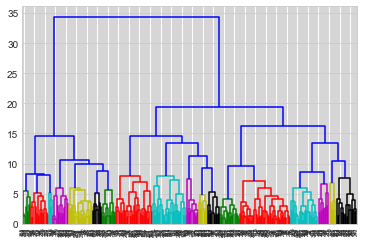

{1, 2, 3, 4, 5}
Counter({3: 94, 4: 64, 5: 60, 2: 57, 1: 28})


In [111]:
k = 5
color_threshold = 8.
d = sch.distance.pdist(df_mod[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [112]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['goal'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['goal'])))

1 28
[0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4]
2 57
[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
3 94
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4]
4 64
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2]
5 60
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4]


In [113]:
# display clusters with the frequency of age intervals

# add id column
df_results_copy = df_results.copy()
df_id = pnd.DataFrame({'id': range(0, len(df_results), 1)})
df_results_copy = pnd.concat([df_id, df_results_copy], axis=1)
df_results_group = df_results_copy.groupby(['cluster', 'goal'])['id'].count().reset_index()
print(df_results_group)
for cluster in set(T):
    print((cluster), (len(df_results_group[df_results_group['cluster']==cluster]['goal'])))
    print(list(df_results_group[df_results_group['cluster']==cluster]['goal']))
    print(list(df_results_group[df_results_group['cluster']==cluster]['id']))

    cluster  goal  id
0         1     0   2
1         1     1   2
2         1     2  10
3         1     3   7
4         1     4   7
5         2     0   3
6         2     1  15
7         2     2  15
8         2     3  20
9         2     4   4
10        3     0  55
11        3     1  22
12        3     2   9
13        3     3   7
14        3     4   1
15        4     0  59
16        4     1   4
17        4     2   1
18        5     0  45
19        5     1  12
20        5     2   1
21        5     3   1
22        5     4   1
1 5
[0, 1, 2, 3, 4]
[2, 2, 10, 7, 7]
2 5
[0, 1, 2, 3, 4]
[3, 15, 15, 20, 4]
3 5
[0, 1, 2, 3, 4]
[55, 22, 9, 7, 1]
4 3
[0, 1, 2]
[59, 4, 1]
5 5
[0, 1, 2, 3, 4]
[45, 12, 1, 1, 1]


Clustering 'goal' values seem to lead to a certain separation with 3 clusters for 0 or 1 major vessels narrowed by more than 50% and 2 for more than 2 major vessels narrowed by more than 50%.